## Importing required libraries

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

## Loading Dataset

In [154]:
df = pd.read_csv("Churn_Modelling.csv")

In [155]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Statistics

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Uni-variate analysis

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

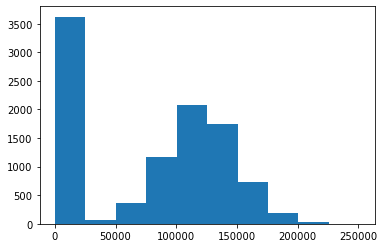

In [158]:
plt.hist(df["Balance"])

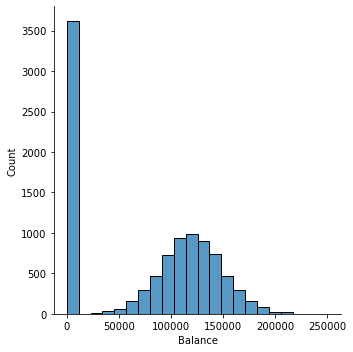

In [159]:
sns.displot(df["Balance"])

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

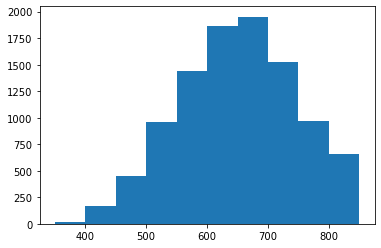

In [160]:
plt.hist(df["CreditScore"])

## Bi-variate analysis

c:\Users\yuvar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='EstimatedSalary'>

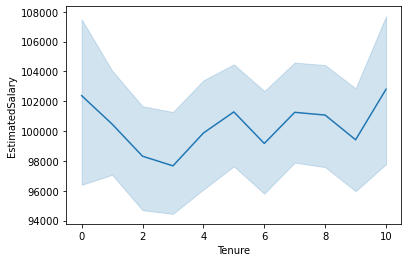

In [161]:
sns.lineplot(df['Tenure'],df['EstimatedSalary'])

## Multi-variate analysis

<AxesSubplot:>

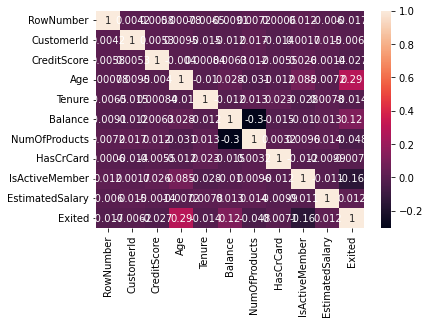

In [162]:
sns.heatmap(df.corr(),annot=True)

## Handling missing values

In [163]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Handling Outliers

c:\Users\yuvar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

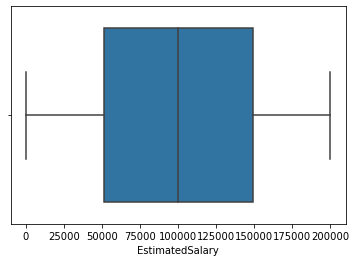

In [164]:
sns.boxplot(df["EstimatedSalary"])

c:\Users\yuvar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

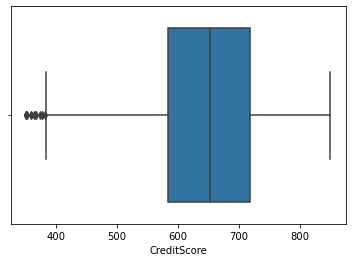

In [165]:
sns.boxplot(df["CreditScore"])

In [166]:
q1 = df.CreditScore.quantile(0.25)
q3 = df.CreditScore.quantile(0.75)
q2 = df.CreditScore.median()
IQR = q3 - q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
print(q2)

652.0


In [167]:
df["CreditScore"] = np.where((df["CreditScore"]<lower_limit) | (df["CreditScore"]>upper_limit),q2,df["CreditScore"])

c:\Users\yuvar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

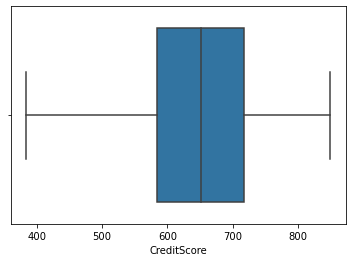

In [168]:
sns.boxplot(df["CreditScore"])

## Encoding Categorical Columns

In [169]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [171]:
le = LabelEncoder()
df.Geography = le.fit_transform(df.Geography)
df.Gender = le.fit_transform(df.Gender)
df.Surname = le.fit_transform(df.Surname)

In [172]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


## Split Independent and Dependent columns

In [173]:
y = df["EstimatedSalary"]
X = df.drop("EstimatedSalary",axis=1)

In [174]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [175]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,1115,619.0,0,0,42,2,0.00,1,1,1,1
1,2,15647311,1177,608.0,2,0,41,1,83807.86,1,0,1,0
2,3,15619304,2040,502.0,0,0,42,8,159660.80,3,1,0,1
3,4,15701354,289,699.0,0,0,39,1,0.00,2,0,0,0
4,5,15737888,1822,850.0,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771.0,0,1,39,5,0.00,2,1,0,0
9996,9997,15569892,1336,516.0,0,1,35,10,57369.61,1,1,1,0
9997,9998,15584532,1570,709.0,0,0,36,7,0.00,1,0,1,1
9998,9999,15682355,2345,772.0,1,1,42,3,75075.31,2,1,0,1


## Scaling Independent Variables

In [176]:
scaled_X = pd.DataFrame(scale(X),columns=X.columns)

## Train Test Split

In [177]:
Xtrain,Xtest,ytrain,ytest = train_test_split(scaled_X,y,test_size=0.3,random_state=0)

In [178]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(7000, 13) (3000, 13) (7000,) (3000,)
